In [1]:
### A1 ###

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpp
from sklearn import svm
import tensorflow as tf
import random
import palettable

Text(0, 0.5, 'f(x)')

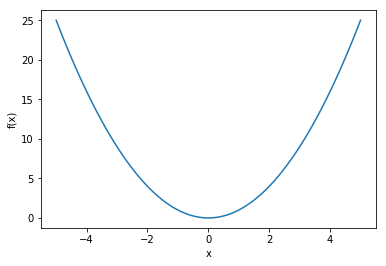

In [2]:
### A2 - 1 ###

# generate xdata
x = np.linspace(-5, 5, num=100, endpoint=True)

# define quadratic function
def y(x):
    return x**2

# plot function with given xdata
plt.plot(x, y(x))
plt.xlabel("x")
plt.ylabel("f(x)")

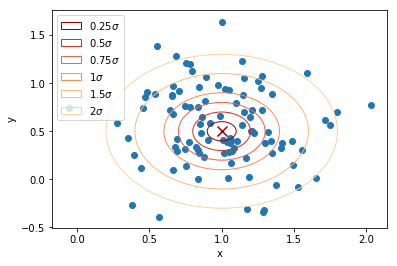

In [3]:
### A2 - 2 ###

# initialize arrays for x and y data
samples = 100
s = 0
xdata = np.zeros(samples)
ydata = np.zeros(samples)

# fill arrays with data drawn from Gaussians
while s < samples:
    xdata[s] = random.gauss(1, 0.4)
    ydata[s] = random.gauss(0.5, 0.4)
    s += 1

# plot
plt.figure()
plt.scatter(xdata, ydata)
ax = plt.gca()
color = palettable.colorbrewer.sequential.OrRd_7_r.mpl_colors
col = 0
plt.scatter([1], [0.5], marker="x", s = 100, color = color[col]) # plot mean

sigmafactors = [.25, .5, .75, 1, 1.5, 2]
sigmax = 0.4
sigmay = 0.4
for s in sigmafactors: # contour lines (ellipses) 
    label = "$%g\sigma$" % s 
    e = mpp.Ellipse((1,0.5), 2*s*sigmax, 2*s*sigmay, fill=False, label=label, color = color[col])
    ax.add_patch(e)
    col += 1
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [4]:
### A3 - 1 ###

# set interval
xstart = -5
xend = 8
fit_xdata = np.linspace(xstart, xend, 1000) # for plotting fits


# define function
def f(x):
    return 7.2 - 3.1*x + 4.3* x**3

# generate noisy data
def generate_noisydata(xstart, xend, bins, f):
    # initialize x and y arrays
    xdata = np.linspace(xstart, xend, num=bins+1)
    ydata = np.zeros(bins+1)

    # modify ydata by adding Gaussian random variables
    ind = 0
    for x in xdata:
        ydata[ind] = f(x) + random.gauss(0,150)
        ind += 1
        
    return xdata, ydata

# generate noisy data for 100 bins
bins = 100
xdata, ydata = generate_noisydata(xstart, xend, bins, f)

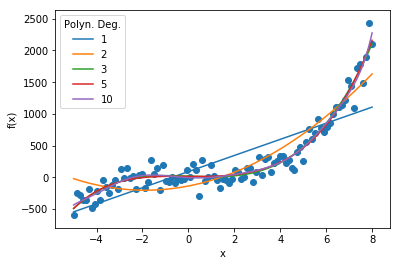

In [5]:
### A3 - 2 ###

# define polynomial degrees which shall be fitted
polys = [1, 2, 3, 5, 10]

def fitpolys(polys, xstart, xend, xdata, ydata, fit_xdata, bins, fig_ind=1):
    ''' xdata, ydata: data to be fitted
    xstart, xend: specifies the boundaries of the fitting interval
    fit_xdata: xdata for fit
    bins: number of data points in specified array
    fig_ind: figure index for mpl's figure '''
    plt.figure(fig_ind)
    fitcoeffs = []

    # generate fit coefficients for all specified polynomial degrees
    # using numpy's polyfit
    ind = 0
    for p in polys:
        fitcoeffs.append( np.polyfit(xdata, ydata, deg=p) )
        ind += 1

    # initialize overall fit data arrays and generate fit data:
    # take coefficient array for every polynomial
    fit_ydatas = []
    ind = 0
    for coeff in fitcoeffs:
        # initialize ydata array for current polynomial
        poly_degree = 0
        fit_ydata = np.zeros(len(fit_xdata))
        coeff = coeff[::-1] # start with coeff from lowest polynomial

        # create ydata for the current polynomial:
        # the fit is given by sum[ c_i * x^(p_i) ]
        for c in coeff:
            fit_ydata += c * (fit_xdata ** poly_degree)
            poly_degree += 1 

        # append generated data to overall fit array and plot
        fit_ydatas.append(fit_ydata)
        label = "%d" % polys[ind]
        plt.plot(fit_xdata, fit_ydata, label=label)
        ind += 1
    
    # plot data points
    plt.scatter(xdata, ydata)
    plt.legend(title="Polyn. Deg.")
    plt.xlabel("x")
    plt.ylabel("f(x)")
 
fitpolys(polys, xstart, xend, xdata, ydata, fit_xdata, bins)

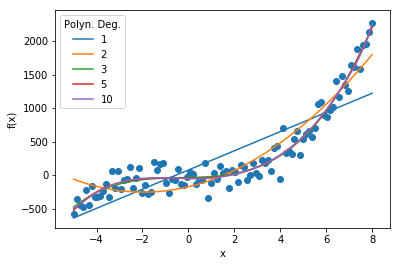

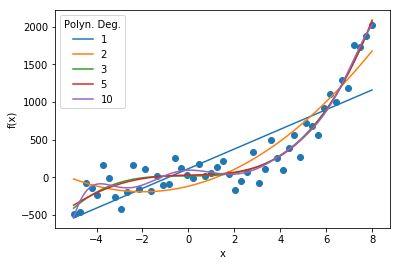

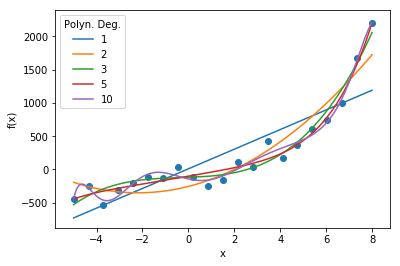

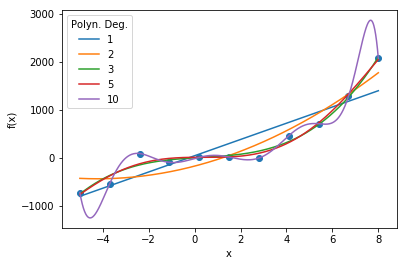

In [6]:
### A3 - 3 ###
### Reduced data sets

bins_arr = [100, 50, 20, 10]

fig_ind = 0
for bins in bins_arr:
    # generate current reduced data set
    xdata, ydata = generate_noisydata(xstart, xend, bins, f)
    # fit the polynomial and plot
    fitpolys(polys, xstart, xend, xdata, ydata, fit_xdata, bins, fig_ind = fig_ind)
    fig_ind += 1

A3 - 3 / Reduced data sets

Observations:
- For large sample sizes (100 bins), polynomial degrees larger than 3 result in rougly the same fit, meaning that the orgiginal polynomial degree of 3 may be retrieved.
- For small sample sizes (extreme case: 10 bins), we can observe over-fitting for the high polynomial degree of 10. This overfitting does not happen with a larger number of bins. 
- As a result, we see that the relation of the number of data points should be much higher than the number of fitting parameters to obtain solid fitting results.


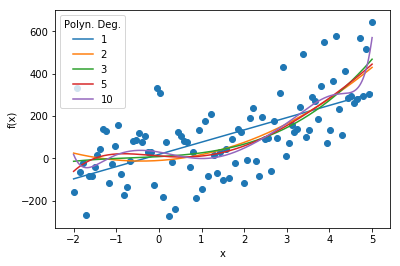

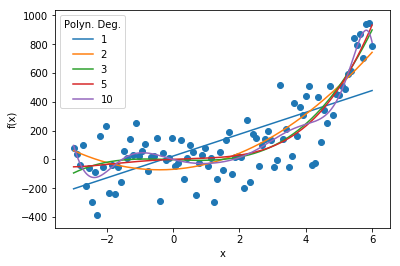

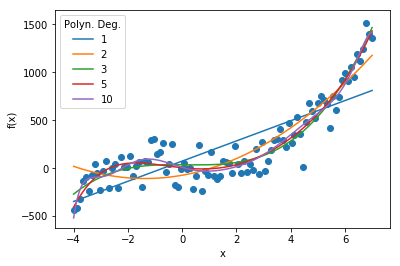

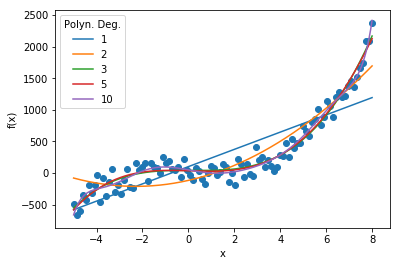

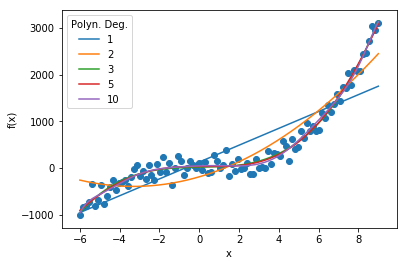

In [7]:
### A3 - 3 ###
### Modified intervals
bins = 100
intervals = [(-2,5), (-3,6), (-4,7), (-5,8), (-6,9)]

# plot for various intervals
fig_ind = 0
for (xstart, xend) in intervals:
    # adapt fit_xdata to interval
    fit_xdata = np.linspace(xstart, xend, 1000) # for plotting fits
    # generate current reduced data set
    xdata, ydata = generate_noisydata(xstart, xend, bins, f)
    # fit the polynomial and plot
    fitpolys(polys, xstart, xend, xdata, ydata, fit_xdata, bins, fig_ind = fig_ind)
    fig_ind += 1

A3 - 3 / Modified Intervals

Observations:
- The larger the interval, the more higher polynomial fits resemble the ideal fit of a polynomial degree of 3. There is enough data to characterize the function as a degree 3 polynomial.
- The smaller the interval, the less features of the actual function are given and deviations matter more. This is seen from stronger variations in higher polynomials.
- Lower degree polynomials may fit certain intervals of the function better (such as linear regions in the degree 3 polynomial), however they badly predict the overall function.
- To conclude, a broad fitting interval is crucial for determining the correct fitting function.
